In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'C:\\Users\\Ufuk Altan\\Desktop\\School\\Semester1\\MarketingAnalysis\\data\\'
df = pd.read_csv(path + 'adult_income.csv')
df.head()

,ID,age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_high
0,1,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,No
1,2,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,No
2,3,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,No
3,4,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,No
4,5,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,No


In [3]:
def countplot_percentages(data, IV, DV):
    """
    Pass in dataframe, one independent and one dependent variable. They both should be categorical data and there should be no null values in the dataset
    """
    try:
        for iv_val in data[IV].unique(): 
            for dv_val in data[DV].unique():

                value = data[data[IV] == iv_val][DV].value_counts()[dv_val]
                print(f'{iv_val} {dv_val} Percentage --> {100 * value / (data[IV].value_counts()[iv_val])}')
    except KeyError:
        pass

In [4]:
df.shape

(32561, 13)

In [5]:
df.isnull().sum()

ID                0
age               0
workclass         0
education_num     0
marital_status    0
occupation        0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_high       0
dtype: int64

In [6]:
df.dtypes

ID                 int64
age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_high       object
dtype: object

<AxesSubplot:xlabel='income_high', ylabel='hours_per_week'>

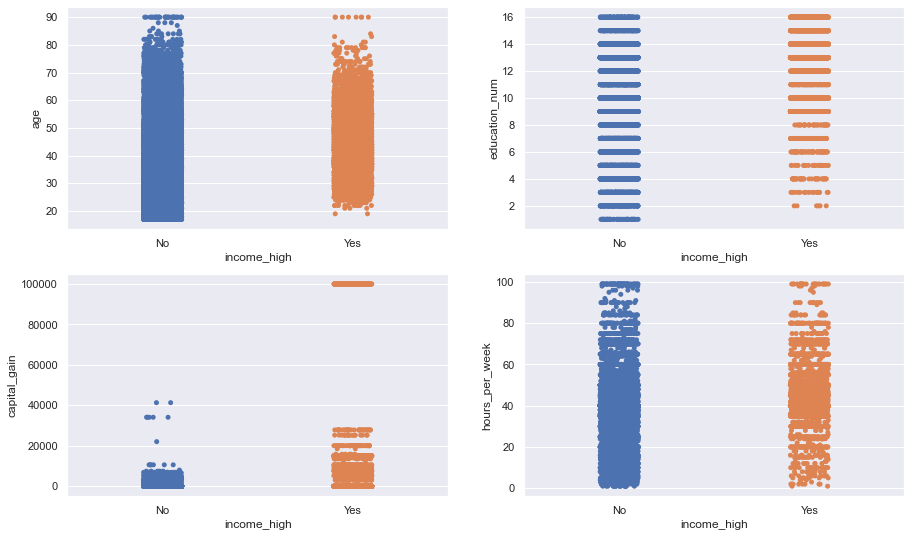

In [7]:
plt.figure(figsize = (15,9))

plt.subplot(2,2,1)
sns.stripplot(data = df, x = 'income_high', y = 'age')

plt.subplot(2,2,2)
sns.stripplot(data = df, x = 'income_high', y = 'education_num')

plt.subplot(2,2,3)
sns.stripplot(data = df, x = 'income_high', y = 'capital_gain')

plt.subplot(2,2,4)
sns.stripplot(data = df, x = 'income_high', y = 'hours_per_week')

In [8]:
# Stripplots do not show clear evidence of any relationship with the dependent variable

<AxesSubplot:xlabel='income_high', ylabel='count'>

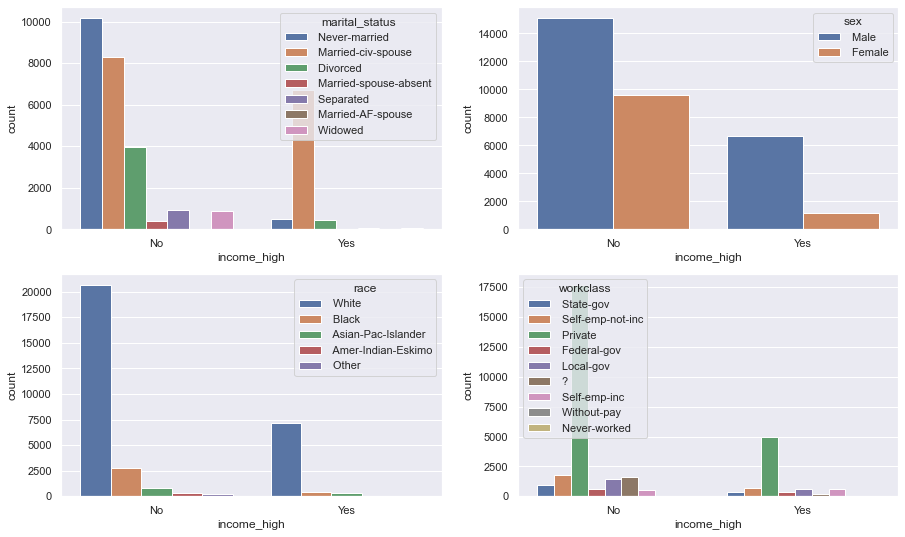

In [9]:
plt.figure(figsize = (15,9))

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'income_high', hue = 'marital_status')

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'income_high', hue = 'sex')

plt.subplot(2,2,3)
sns.countplot(data = df, x = 'income_high', hue = 'race')

plt.subplot(2,2,4)
sns.countplot(data = df, x = 'income_high', hue = 'workclass')

In [10]:
# Some variables effects can not be seen very clearly, therefore we calculate percenatages of high_income

In [11]:
# At the beginning, it is possible to assume that some races may be earning higher incomes than others.
# But we have more data for some races and less for others therefore information can be deceiving

In [12]:
countplot_percentages(df, 'race', 'income_high')

 White No Percentage --> 74.41400632729365
 White Yes Percentage --> 25.585993672706355
 Black No Percentage --> 87.61203585147247
 Black Yes Percentage --> 12.387964148527528
 Asian-Pac-Islander No Percentage --> 73.43599615014438
 Asian-Pac-Islander Yes Percentage --> 26.56400384985563
 Amer-Indian-Eskimo No Percentage --> 88.42443729903538
 Amer-Indian-Eskimo Yes Percentage --> 11.57556270096463
 Other No Percentage --> 90.77490774907749
 Other Yes Percentage --> 9.22509225092251


In [13]:
# Males have a higher percentage of high_income

In [14]:
countplot_percentages(df, 'sex', 'income_high')

 Male No Percentage --> 69.42634235888022
 Male Yes Percentage --> 30.57365764111978
 Female No Percentage --> 89.05394113824157
 Female Yes Percentage --> 10.946058861758425


In [15]:
# Most of have similar values except Self-emp-inc seems to have a low income percentage
# Never-worked value does not seem to have a difference from Without-pay value

In [16]:
countplot_percentages(df, 'workclass', 'income_high')

 State-gov No Percentage --> 72.80431432973806
 State-gov Yes Percentage --> 27.19568567026194
 Self-emp-not-inc No Percentage --> 71.5072805981897
 Self-emp-not-inc Yes Percentage --> 28.492719401810312
 Private No Percentage --> 78.13271060979908
 Private Yes Percentage --> 21.867289390200916
 Federal-gov No Percentage --> 61.354166666666664
 Federal-gov Yes Percentage --> 38.645833333333336
 Local-gov No Percentage --> 70.52078356426182
 Local-gov Yes Percentage --> 29.479216435738174
 ? No Percentage --> 89.59694989106754
 ? Yes Percentage --> 10.403050108932462
 Self-emp-inc No Percentage --> 44.2652329749104
 Self-emp-inc Yes Percentage --> 55.7347670250896
 Without-pay No Percentage --> 100.0


In [17]:
# Here most values seem to have different effects on the income_high therefore they would be so helpful to measure different

In [18]:
countplot_percentages(df, 'occupation', 'income_high')

 Adm-clerical No Percentage --> 86.55172413793103
 Adm-clerical Yes Percentage --> 13.448275862068966
 Exec-managerial No Percentage --> 51.59862272503689
 Exec-managerial Yes Percentage --> 48.40137727496311
 Handlers-cleaners No Percentage --> 93.72262773722628
 Handlers-cleaners Yes Percentage --> 6.2773722627737225
 Prof-specialty No Percentage --> 55.09661835748792
 Prof-specialty Yes Percentage --> 44.90338164251208
 Other-service No Percentage --> 95.8421851289833
 Other-service Yes Percentage --> 4.157814871016692
 Sales No Percentage --> 73.06849315068493
 Sales Yes Percentage --> 26.931506849315067
 Craft-repair No Percentage --> 77.33593559404733
 Craft-repair Yes Percentage --> 22.664064405952672
 Transport-moving No Percentage --> 79.9624295554164
 Transport-moving Yes Percentage --> 20.037570444583594
 Farming-fishing No Percentage --> 88.43058350100604
 Farming-fishing Yes Percentage --> 11.569416498993963
 Machine-op-inspct No Percentage --> 87.51248751248751
 Machine-o

In [19]:
df['income_high'] = df['income_high'].replace({'Yes': 1, 'No': 0})

In [20]:
# Split Data

In [21]:
X = df.iloc[:,1:12]
y = df['income_high']

In [22]:
X = pd.get_dummies(X, drop_first=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [24]:
# Build Model

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [27]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

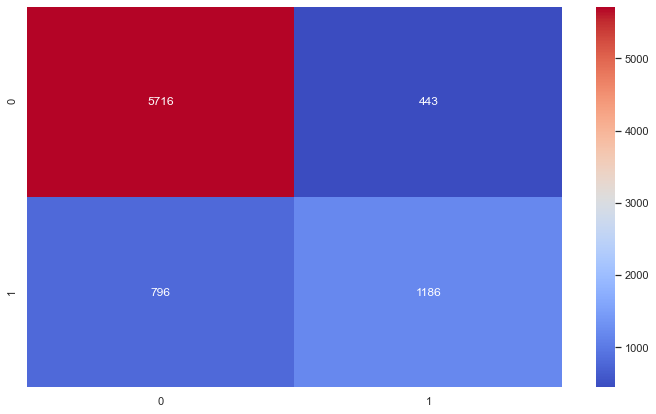

In [28]:
plt.figure(figsize = (12,7))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap ='coolwarm',fmt='.4g')

In [29]:
accuracy_score(y_test,y_pred)

0.8478073946689596

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6159
           1       0.73      0.60      0.66      1982

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141

